### Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
import pickle

In [3]:
# Load the CSV file
df = pd.read_csv("IPL_Data.csv")

# --- Data Cleaning and Preprocessing ---

# Columns to drop that are not useful for prediction or are redundant
drop_cols_initial = ['Url', 'Full Name', 'Born', 'Best', 'S/R', 'Sport', 'Mtc']
df_cleaned = df.drop(columns=drop_cols_initial, errors='ignore')

# Drop rows where 'RunsScored' (target variable) is missing
df_cleaned = df_cleaned[df_cleaned['RunsScored'].notnull()]

# --- NEW: Filter out players with 0 ValueinCR ---
# Assuming 'ValueinCR' is already numeric or can be safely converted
df_cleaned['ValueinCR'] = pd.to_numeric(df_cleaned['ValueinCR'], errors='coerce').fillna(0)
df_cleaned = df_cleaned[df_cleaned['ValueinCR'] > 0]


# Fill remaining NaN values.
df_cleaned = df_cleaned.fillna(0)

# Convert 'Age' to a numerical format
def extract_years(age_str):
    if isinstance(age_str, str) and 'Years' in age_str:
        try:
            return int(age_str.split(' ')[0])
        except ValueError:
            return 0
    return age_str

df_cleaned['Age'] = df_cleaned['Age'].apply(extract_years)
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce').fillna(0)

# Handle 'HighestInnScore' column to extract numerical part
def extract_highest_score(score_str):
    if isinstance(score_str, str):
        try:
            return int(score_str.split(' ')[0])
        except ValueError:
            return 0
    return score_str

df_cleaned['HighestInnScore'] = df_cleaned['HighestInnScore'].apply(extract_highest_score)
df_cleaned['HighestInnScore'] = pd.to_numeric(df_cleaned['HighestInnScore'], errors='coerce').fillna(0)


# Identify categorical features for one-hot encoding
categorical_features = ['Team', 'Type', 'Batting Style', 'National Side', 'Bowling']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=False)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Name', 'RunsScored',], errors='ignore')
y = df_encoded['RunsScored']

# --- Model Training ---

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# --- Prediction and Evaluation ---
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = root_mean_squared_error(y_test, y_pred)

print(f"R-squared (R2) on test set: {r2:.2f}")
print(f"Mean Squared Error (MSE) on test set: {mse:.2f}")

# --- Save the Model and Feature Names ---
with open("cricket_model.pkl", "wb") as f:
    pickle.dump((model, X.columns.tolist()), f)

print("\nModel trained and saved as 'cricket_model.pkl'")
print("Features used for training (order matters for prediction input):")
print(X.columns.tolist())


R-squared (R2) on test set: 0.98
Mean Squared Error (MSE) on test set: 176.38

Model trained and saved as 'cricket_model.pkl'
Features used for training (order matters for prediction input):
['ValueinCR', 'Age', 'MatchPlayed', 'InningsBatted', 'NotOuts', 'HighestInnScore', '100s', '50s', '4s', '6s', 'BattingAVG', 'BattingS/R', 'CatchesTaken', 'StumpingsMade', 'Ducks', 'R/O', 'InningsBowled', 'Overs', 'Maidens', 'RunsConceded', 'Wickets', '3s', '5s', 'BowlingAVG', 'EconomyRate', 'Team_CSK', 'Team_DC', 'Team_GT', 'Team_KKR', 'Team_LSG', 'Team_MI', 'Team_PBKS', 'Team_RCB', 'Team_RR', 'Team_SRH', 'Type_All-Rounder ', 'Type_Batsman ', 'Type_Bowler ', 'Type_Wicket-Keeper ', 'Type_Wicket-keeper ', 'Batting Style_Left Handed', 'Batting Style_Right Handed', 'National Side_Afghanistan', 'National Side_Australia', 'National Side_Bangladesh', 'National Side_England', 'National Side_India', 'National Side_New Zealand', 'National Side_Singapore', 'National Side_South Africa', 'National Side_Sri Lank

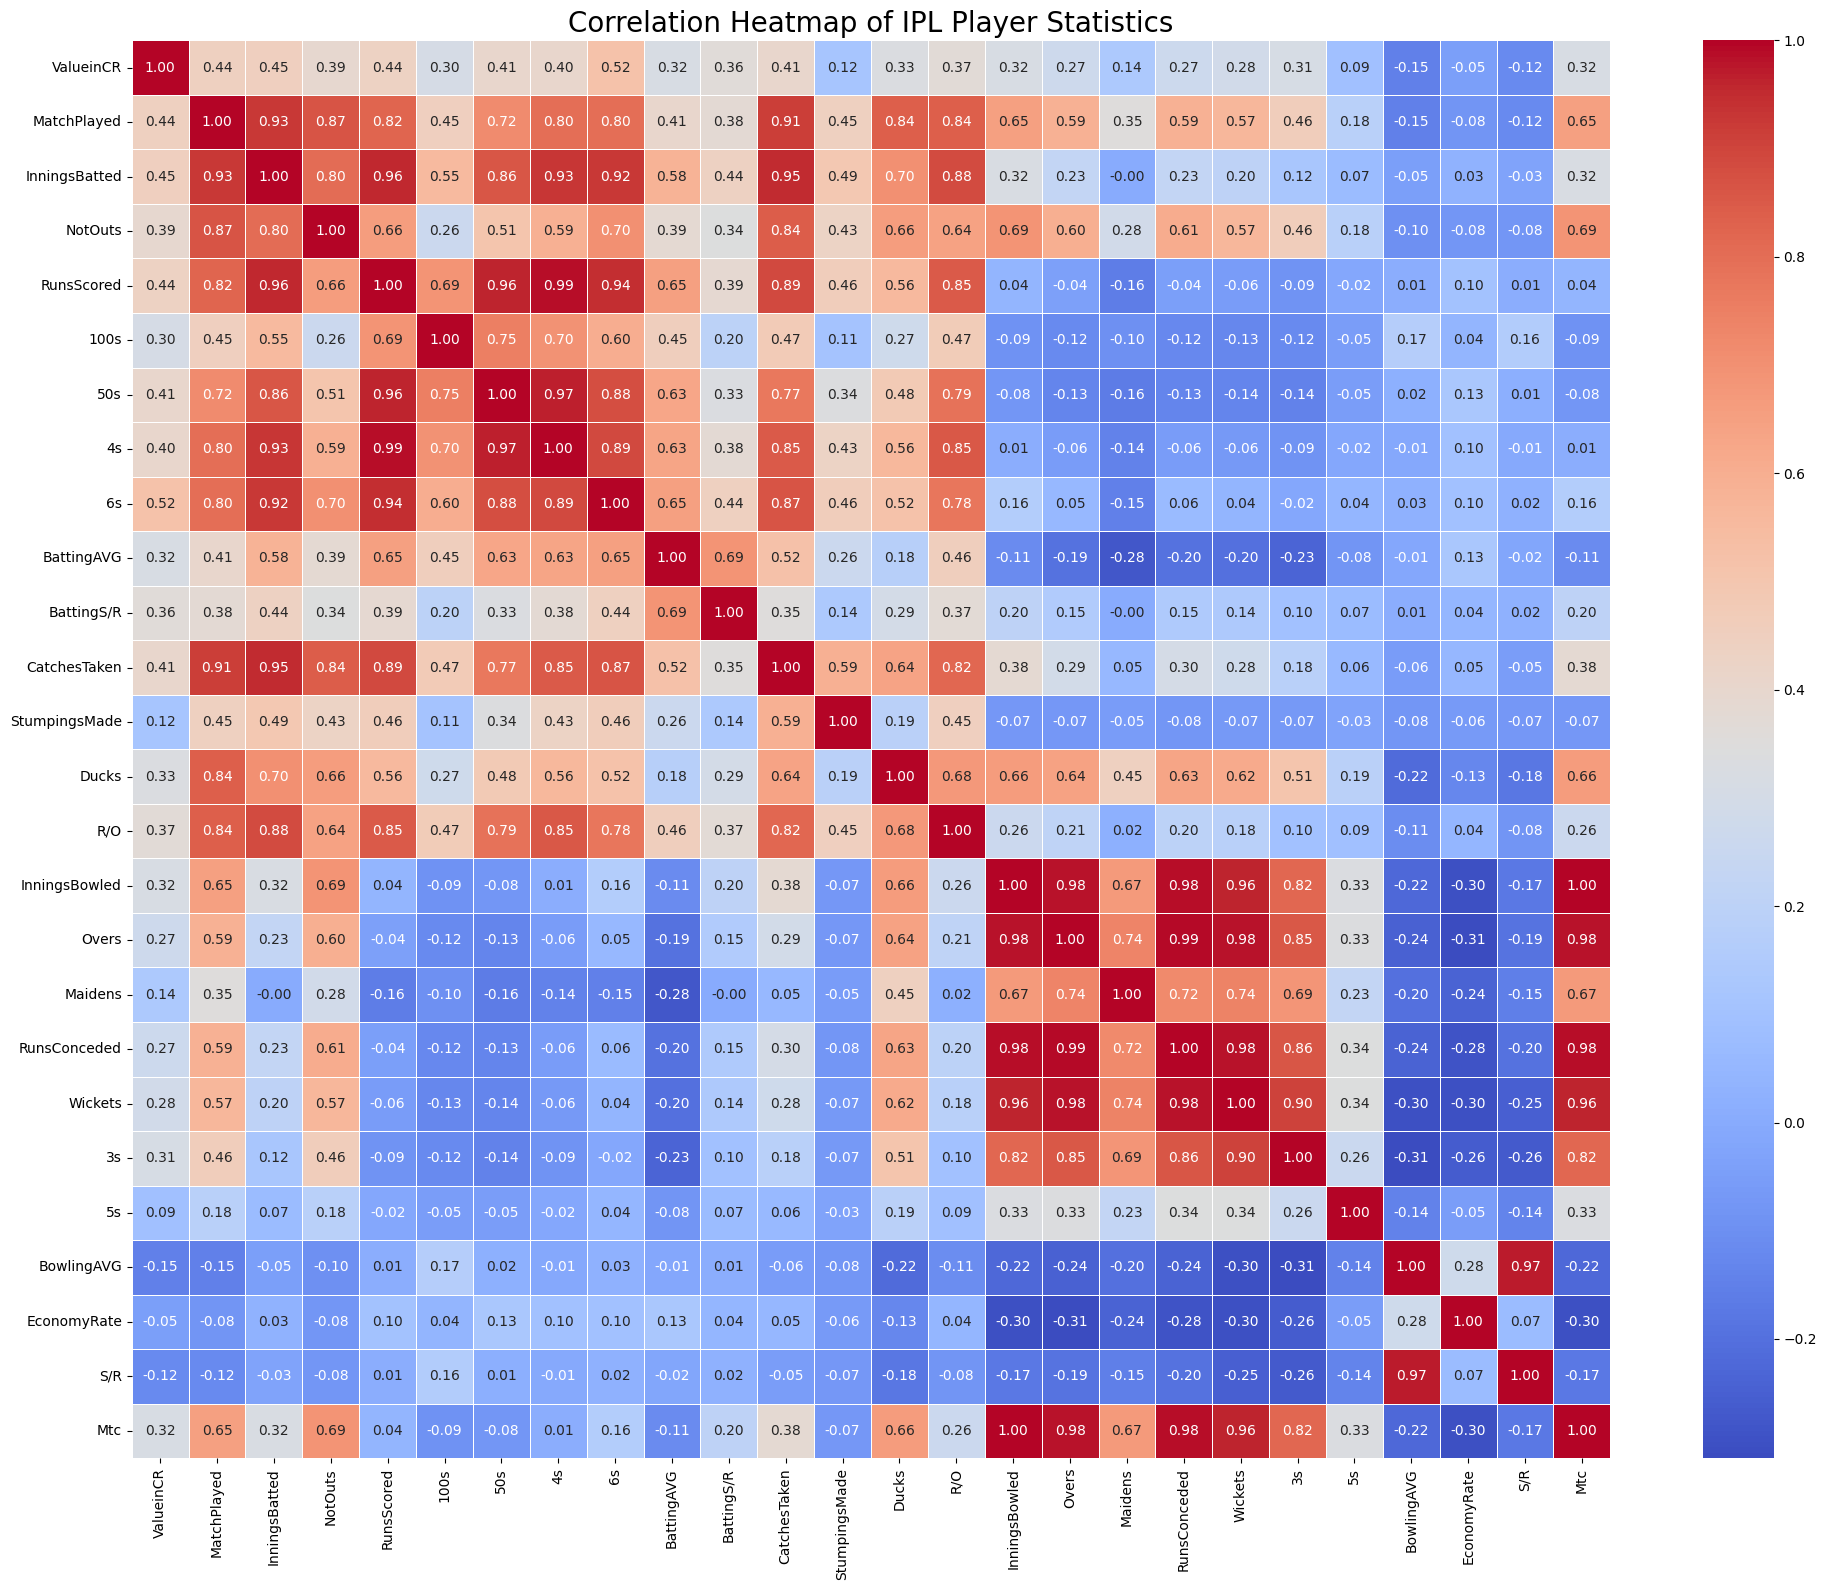

In [4]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16)) # Adjust figure size for better readability, especially with many features

# Draw the heatmap with a mask for the upper triangle (optional, but makes it cleaner)
# mask = np.triu(correlation_matrix) # Uncomment this line if you want to mask the upper triangle
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) # annot=False to avoid clutter
plt.title('Correlation Heatmap of IPL Player Statistics', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [7]:
X.columns


Index(['ValueinCR', 'Age', 'MatchPlayed', 'InningsBatted', 'NotOuts',
       'HighestInnScore', '100s', '50s', '4s', '6s', 'BattingAVG',
       'BattingS/R', 'CatchesTaken', 'StumpingsMade', 'Ducks', 'R/O',
       'InningsBowled', 'Overs', 'Maidens', 'RunsConceded', 'Wickets', '3s',
       '5s', 'BowlingAVG', 'EconomyRate', 'Team_CSK', 'Team_DC', 'Team_GT',
       'Team_KKR', 'Team_LSG', 'Team_MI', 'Team_PBKS', 'Team_RCB', 'Team_RR',
       'Team_SRH', 'Type_All-Rounder ', 'Type_Batsman ', 'Type_Bowler ',
       'Type_Wicket-Keeper ', 'Type_Wicket-keeper ',
       'Batting Style_Left Handed', 'Batting Style_Right Handed',
       'National Side_Afghanistan', 'National Side_Australia',
       'National Side_Bangladesh', 'National Side_England',
       'National Side_India', 'National Side_New Zealand',
       'National Side_Singapore', 'National Side_South Africa',
       'National Side_Sri Lanka', 'National Side_West Indies', 'Bowling_0',
       'Bowling_Left-arm fast', 'Bowling_Left-ar

In [6]:
model.feature_importances_

array([1.02549247e-03, 9.10895681e-04, 2.11762675e-02, 7.59588336e-02,
       9.21985258e-04, 2.52629051e-04, 7.35338062e-04, 1.76469473e-01,
       5.59665248e-01, 1.12431875e-01, 1.07953914e-03, 8.24971267e-04,
       3.43361256e-02, 4.94381574e-04, 1.00264509e-03, 1.93706151e-03,
       6.88204939e-04, 2.02840164e-03, 7.48396010e-07, 1.57648624e-03,
       2.96015180e-04, 2.06464897e-05, 5.05609256e-06, 1.54069373e-03,
       1.98199294e-03, 2.20891924e-04, 2.68920132e-05, 7.07902467e-05,
       1.02699441e-05, 1.44239169e-04, 7.50094635e-06, 5.60119345e-05,
       1.87378384e-04, 7.33746761e-06, 1.96945970e-05, 2.21931581e-05,
       4.02413241e-04, 2.01323370e-07, 1.11595959e-04, 1.93338748e-04,
       4.82046933e-04, 2.87198779e-05, 2.41101792e-09, 1.34622604e-05,
       5.37785933e-10, 8.22196970e-07, 9.42931545e-05, 3.31306146e-07,
       5.87225200e-11, 2.49018064e-05, 1.41626766e-10, 2.05928558e-05,
       4.37460398e-05, 6.47270737e-09, 4.35768058e-09, 2.06622333e-07,
      

In [16]:
df['Type'].unique()

array(['Batsman ', 'All-Rounder ', 'Bowler ', 'Wicket-Keeper ',
       'Wicket-keeper '], dtype=object)